# Tarea 2: Comparación de modelos

### Marcelino Sánchez Rodríguez
### 6 de marzo de 2023

In [179]:
# Load necessary packages
library(rstan)
library(coda)
library(R2jags)
library(methods)

# set the working directory

setwd("/home/rstudio/tarea2RegAvanz")

#--- Funciones utiles ---
prob<-function(x){
  out<-min(length(x[x>0])/length(x),length(x[x<0])/length(x))
  out
}

source("/home/rstudio/tarea2RegAvanz/claseNietor6.R")


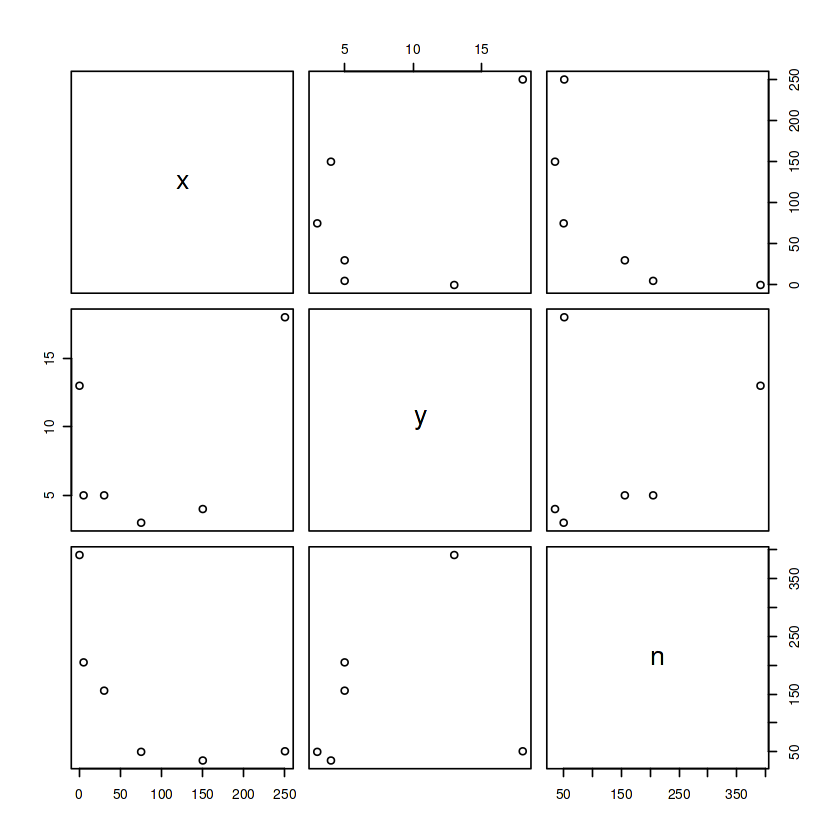

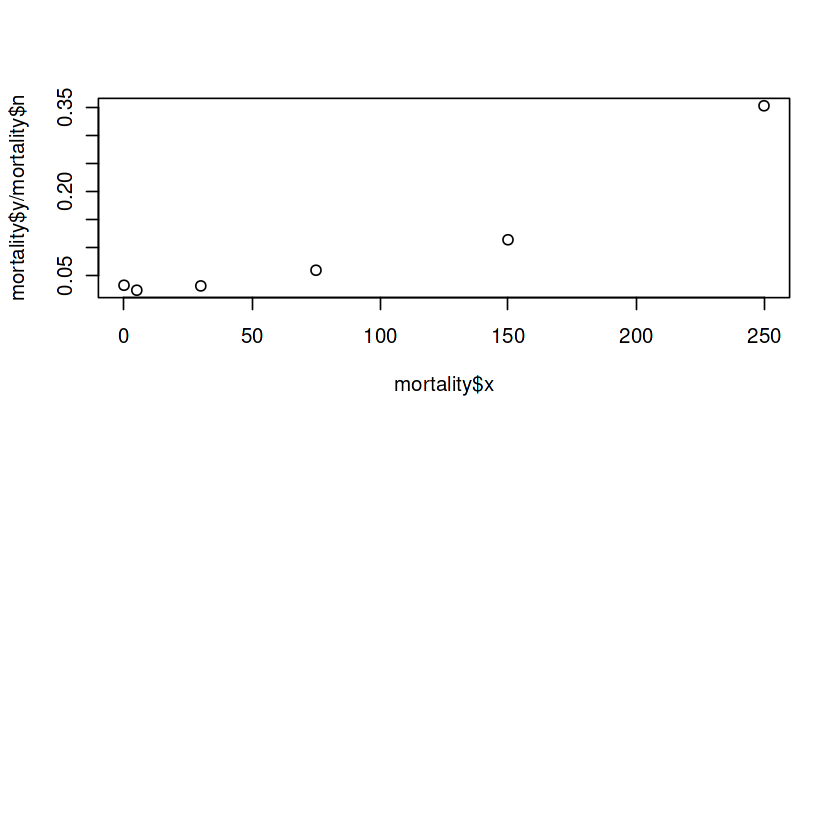

In [180]:
mortality<-read.table("http://gente.itam.mx/lnieto/index_archivos/mortality.txt",header=TRUE)
n<-nrow(mortality)

#creamos gráficas de los datos de mortalidad
par(mfrow = c(2, 1))
plot(mortality)
plot(mortality$x,mortality$y/mortality$n)
m<-1
nef<-c(100)
xf<-c(200)

In [181]:
#-Defining data-
data<-list("n"=n,"ne"=mortality$n,"y"=mortality$y,"x"=mortality$x,"m"=m,"nef"=nef,"xf"=xf)
data2<-list("n"=n,"y"=mortality$y/mortality$n,"x"=mortality$x,"m"=m,"xf"=xf)

#-Defining inits-
inits<-function(){list(beta=rep(0,2),yf1=rep(1,n),yf2=1)}
inits2<-function(){list(beta=rep(0,2),phy=1,yf1=rep(1,n),yf2=1)}

#-Selecting parameters to monitor-
parsa<-c("beta","lambda","yf1","yf2")
parsbc<-c("beta","p","yf1","yf2")
parsd<-c("beta","phy","yf1","yf2")

## Primer modelo

Modelo

$y_{i}|\mu_{i} \sim \text{Poisson}(\mu_{i})$

Relación

$\mu_{i}=\text{n}_{i}\lambda_{i}$

Liga

$\text{log}(\lambda_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [182]:
#corremos código


modelCode1 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dpois(mu[i])
	mu[i]<-ne[i]*lambda[i]
	log(lambda[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dpois(mu[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dpois(muf[i]) 
#	muf[i]<-nef[i]*lambdaf[i]
#	log(lambdaf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dpois(muf) 
	muf<-nef*lambdaf
	log(lambdaf)<-beta[1]+beta[2]*xf

}'

ej5a.sim <- jagsModel$new(data, inits, parsa, modelCode1,n.thin=1, n.iter=50000, n.burnin=5000)

ej5a.sim$runJagsModel()

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 60

Initializing model



## Verificamos convergencia

In [183]:
ej5a.sim$viewSpace()

ej5a.sim$graphConvergence()

ej5a.sim$summaryModel()

ej5a.sim$dicModelfunc()

## Checamos intervalos de predicción

In [ ]:
canvaMortalidad()

mortalidadGraf(ej5a.sim,col=2)

ERROR: Error in canvaMortalidad(): object 'out.yf1' not found


## Segundo modelo (logística)

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode2 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
#	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
#	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'

ej5b.sim <- jagsModel$new(data, inits, parsbc, modelCode2, n.thin=1, n.iter=50000, n.burnin=5000)

ej5b.sim$runJagsModel()



Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 60

Initializing model



## Verificamos convergencia

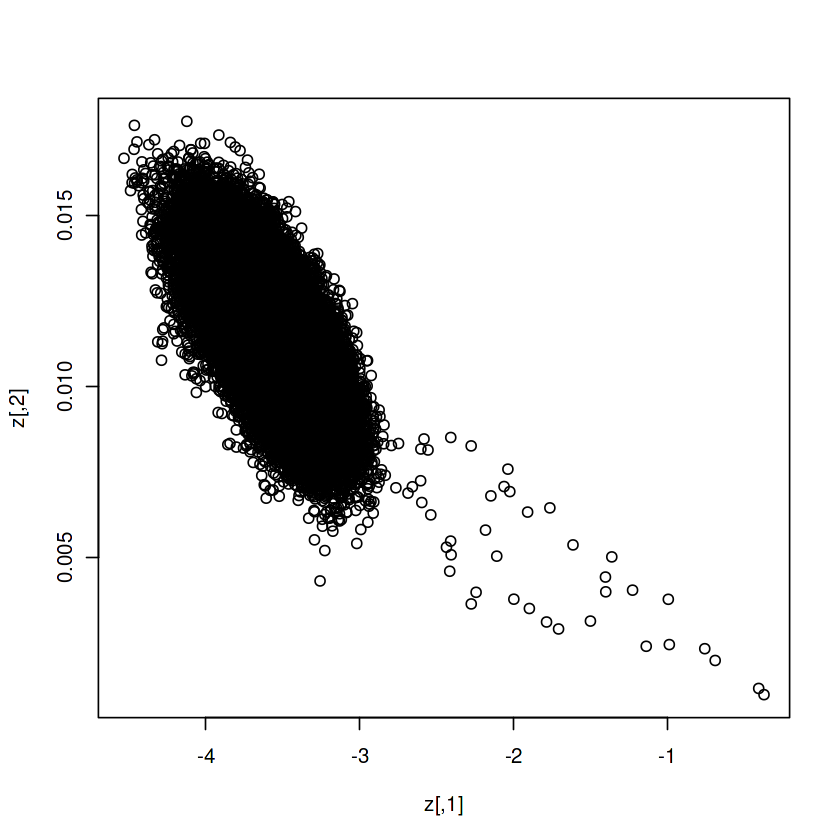

                mean          sd         2.5%         25%         50%
beta[1]  -3.57708760 0.216714383 -4.014758101 -3.71727663 -3.57352242
beta[2]   0.01157897 0.001515897  0.008627135  0.01055716  0.01158435
deviance 24.79465599 5.181517090 22.758867331 23.28648500 24.10219228
p[1]      0.02779909 0.006571274  0.017727388  0.02372357  0.02729115
p[2]      0.02937512 0.006729389  0.018956539  0.02518856  0.02886994
p[3]      0.03867654 0.007614784  0.026349306  0.03386417  0.03817303
p[4]      0.06314696 0.010006322  0.045944046  0.05652855  0.06260683
p[5]      0.13837944 0.021234868  0.099924009  0.12368808  0.13744212
p[6]      0.33856666 0.061772196  0.223028599  0.29586888  0.33665914
yf1[1]   10.85665556 4.124308323  4.000000000  8.00000000 11.00000000
yf1[2]    6.03281111 2.791192297  1.000000000  4.00000000  6.00000000
yf1[3]    6.02954444 2.678601659  2.000000000  4.00000000  6.00000000
yf1[4]    3.15591111 1.789771738  0.000000000  2.00000000  3.00000000
yf1[5]    4.83482222

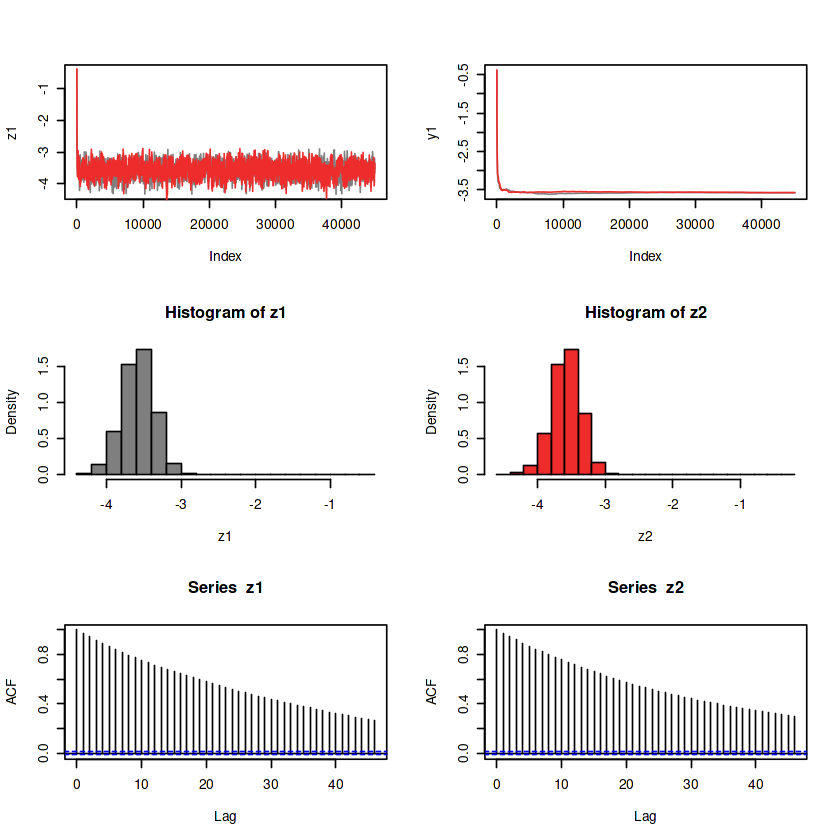

In [ ]:
ej5b.sim$viewSpace()

ej5b.sim$graphConvergence()

ej5b.sim$summaryModel()

ej5b.sim$dicModelfunc()


## Checamos intervalos de predicción

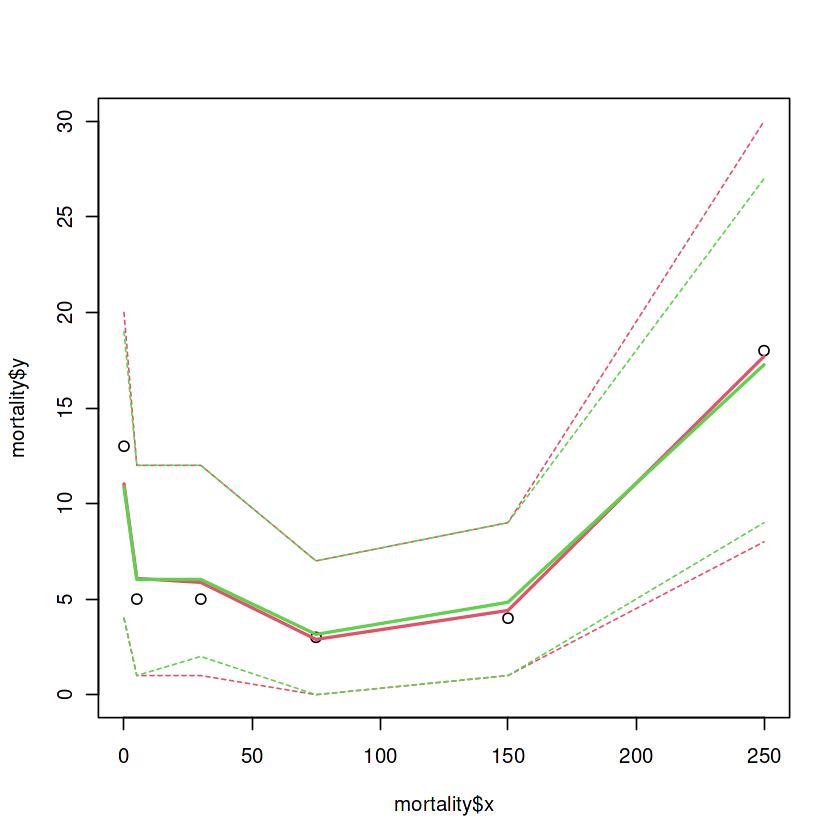

In [ ]:
canvaMortalidad()

mortalidadGraf(ej5a.sim,col=2)

mortalidadGraf(ej5b.sim,col=3)

## Tercer modelo (probit)

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode3 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
#	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
#	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'

ej5b.sim2 <- jagsModel$new(data, inits, parsbc, modelCode3, n.thin=1, n.iter=50000, n.burnin=5000)

ej5b.sim2$runJagsModel()

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 60

Initializing model



## Verificamos convergencia

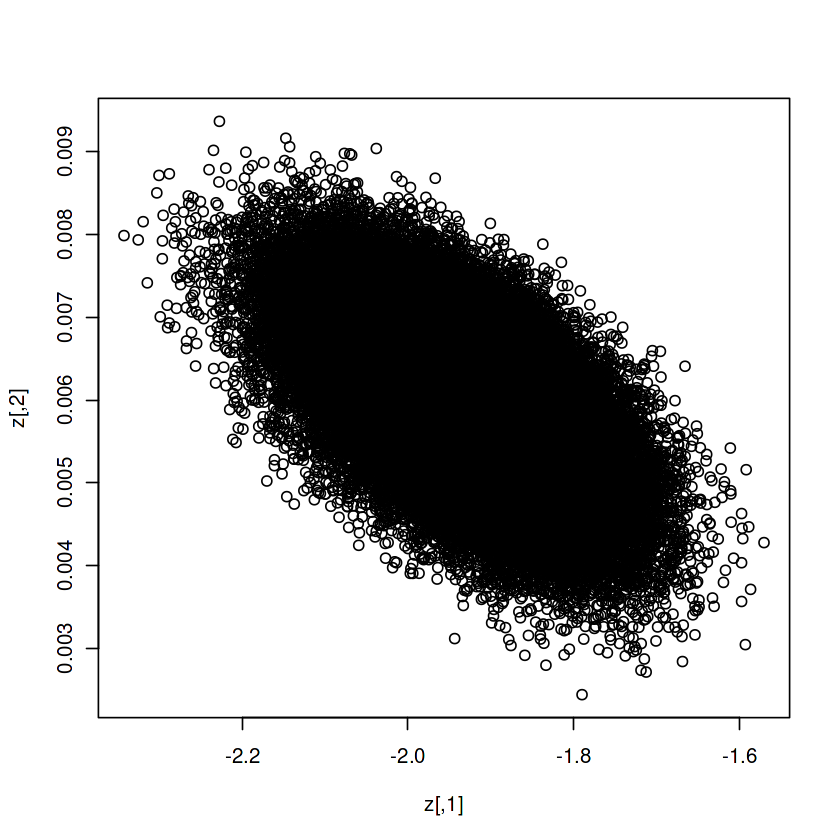

                 mean           sd         2.5%          25%          50%
beta[1]  -1.935704079 0.0921381633 -2.120572302 -1.997112949 -1.934570228
beta[2]   0.005964845 0.0008098788  0.004374157  0.005418171  0.005969387
deviance 25.232613875 1.9967266474 23.275977954 23.804262254 24.611092888
p[1]      0.026954311 0.0057113542  0.016978906  0.022906457  0.026521528
p[2]      0.028830821 0.0058891555  0.018473124  0.024661632  0.028409221
p[3]      0.039963260 0.0068985812  0.027523921  0.035123167  0.039598300
p[4]      0.068885572 0.0099545643  0.050684881  0.061945059  0.068412757
p[5]      0.150173270 0.0234901368  0.107261867  0.133754427  0.149130986
p[6]      0.330544693 0.0595772447  0.219072227  0.288963970  0.328760049
yf1[1]   10.538466667 3.9025548019  4.000000000  8.000000000 10.000000000
yf1[2]    5.905411111 2.6897438943  1.000000000  4.000000000  6.000000000
yf1[3]    6.228855556 2.6629064180  2.000000000  4.000000000  6.000000000
yf1[4]    3.445511111 1.8591761707  0.

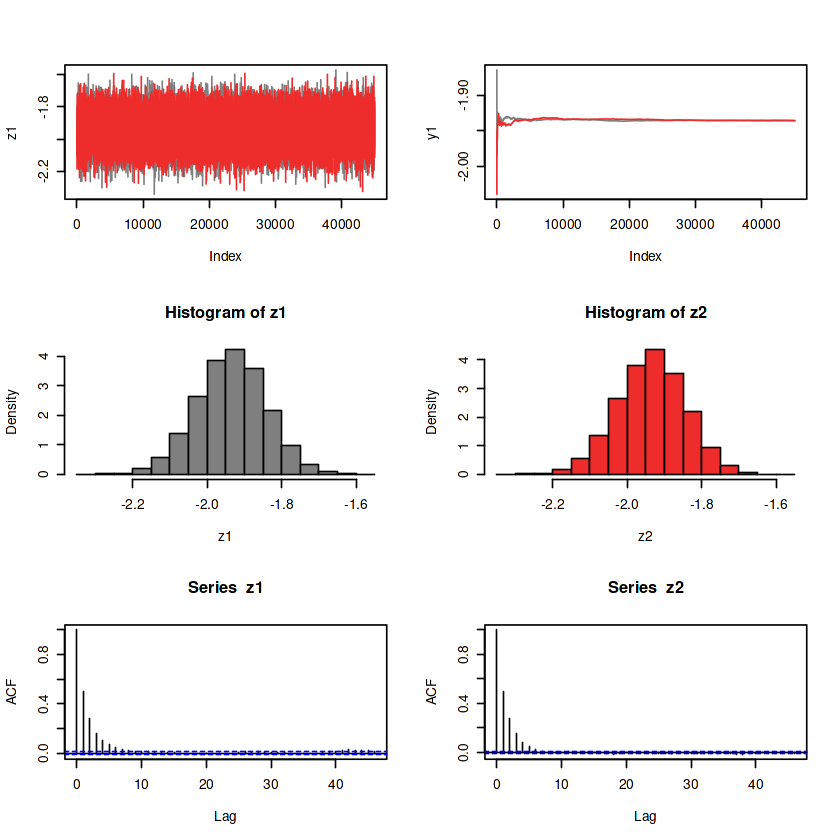

In [ ]:
ej5b.sim2$viewSpace()

ej5b.sim2$graphConvergence()

ej5b.sim2$summaryModel()

ej5b.sim2$dicModelfunc()


## Checamos intervalos de predicción

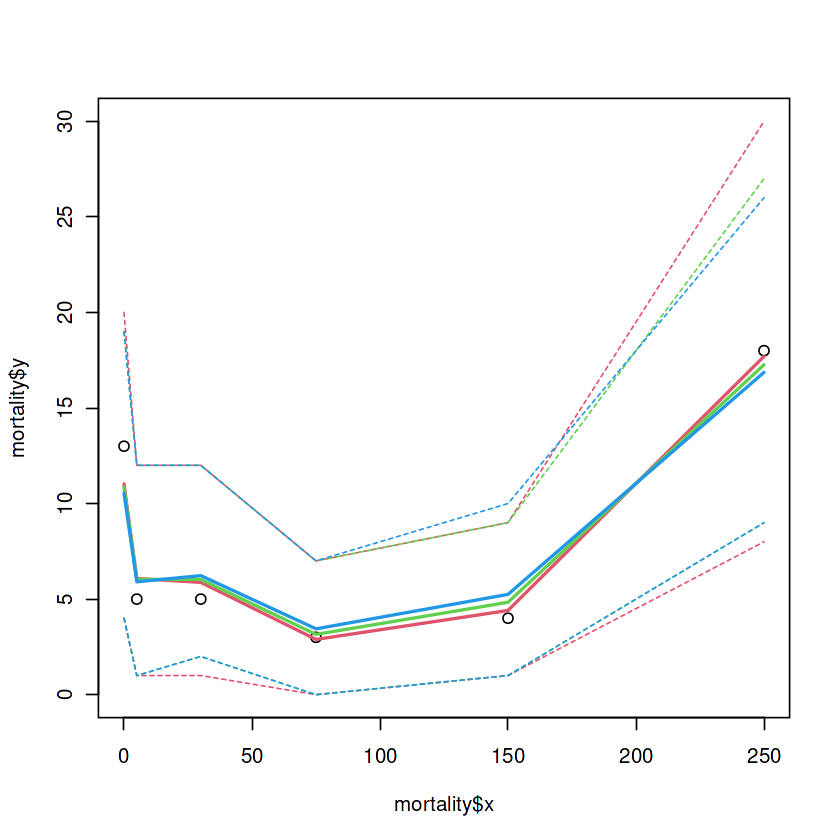

In [ ]:
canvaMortalidad()

mortalidadGraf(ej5a.sim,col=2)

mortalidadGraf(ej5b.sim,col=3)

mortalidadGraf(ej5b.sim2,col=4)

## Cuarto modelo (log-log)

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode4 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
#	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
#	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
	eta[i]<-beta[1]+beta[2]*x[i]
	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
#	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'


ej5b.sim3 <- jagsModel$new(data, inits, parsbc, modelCode4, n.thin=1, n.iter=50000, n.burnin=5000)

ej5b.sim3$runJagsModel()



Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 72

Initializing model



## Checamos convergencia

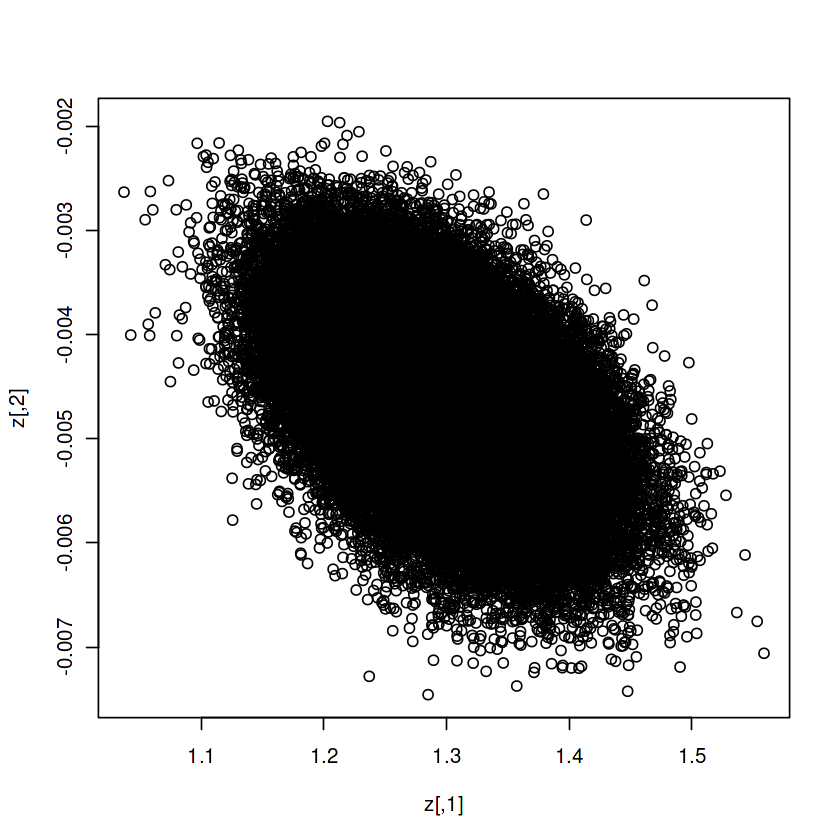

                 mean           sd         2.5%          25%          50%
beta[1]   1.294704647 0.0599025021  1.178668777  1.254321595  1.294345921
beta[2]  -0.004616591 0.0006960733 -0.006003536 -0.005084176 -0.004606884
deviance 26.026351440 1.9920226579 24.083188777 24.607599539 25.411995023
p[1]      0.026442704 0.0057294916  0.016373953  0.022406948  0.026027315
p[2]      0.028688658 0.0059132226  0.018207534  0.024535007  0.028289632
p[3]      0.042078689 0.0070408366  0.029253721  0.037143447  0.041711455
p[4]      0.076146841 0.0112141650  0.055821549  0.068289018  0.075507795
p[5]      0.162042144 0.0269716503  0.113494039  0.143066749  0.160518840
p[6]      0.316991783 0.0554279778  0.212942364  0.278380194  0.315562103
yf1[1]   10.338088889 3.8809730928  4.000000000  8.000000000 10.000000000
yf1[2]    5.867466667 2.6767731559  1.000000000  4.000000000  6.000000000
yf1[3]    6.563188889 2.7434167082  2.000000000  5.000000000  6.000000000
yf1[4]    3.794355556 1.9479383035  1.

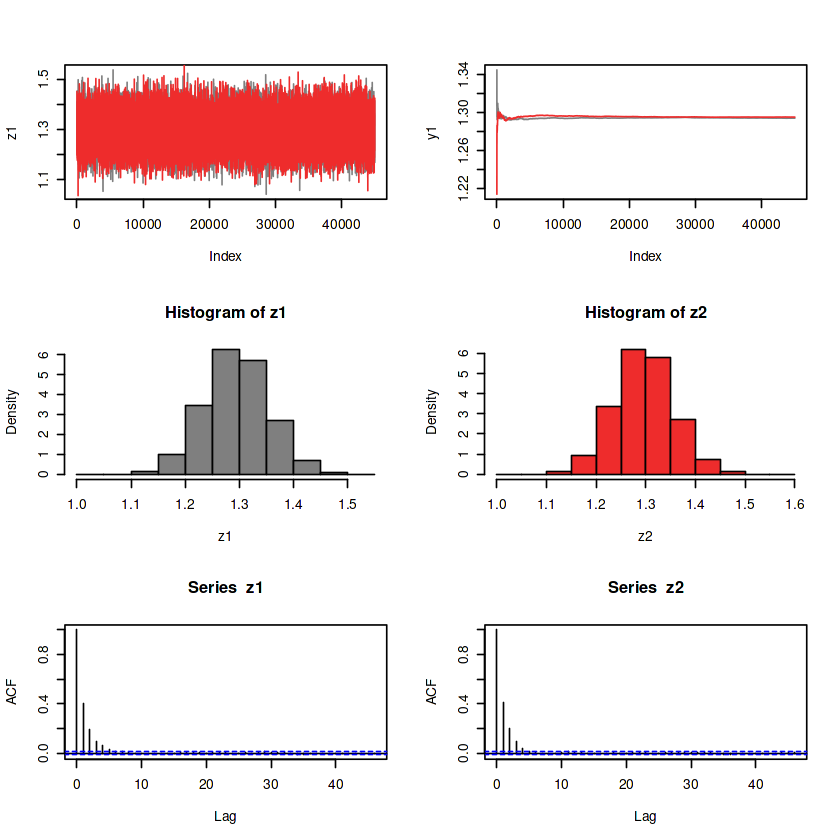

In [ ]:
ej5b.sim3$viewSpace()

ej5b.sim3$graphConvergence()

ej5b.sim3$summaryModel()

ej5b.sim3$dicModelfunc()


## Checamos intervalos de predicción

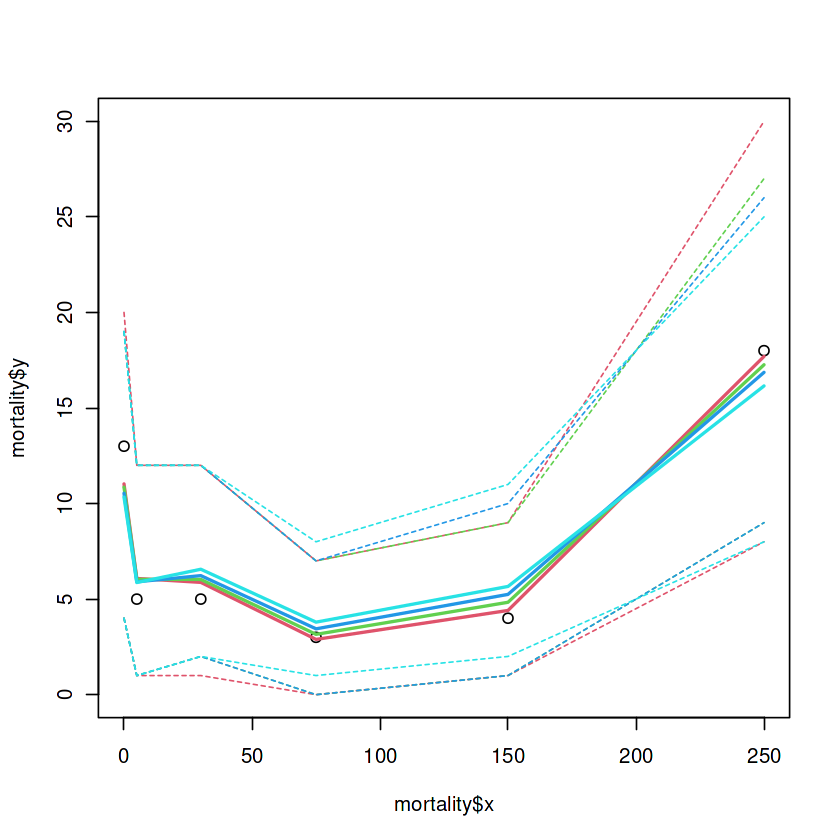

In [ ]:
canvaMortalidad()

mortalidadGraf(ej5a.sim,col=2)

mortalidadGraf(ej5b.sim,col=3)

mortalidadGraf(ej5b.sim2,col=4)

mortalidadGraf(ej5b.sim3,col=5)

## Quinto modelo (clog-log)

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode5 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
#	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
#	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'

ej5b.sim4 <- jagsModel$new(data, inits, parsbc, modelCode5, n.thin=1, n.iter=50000, n.burnin=5000)

ej5b.sim4$runJagsModel()


Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 60

Initializing model



## Checamos convergencia

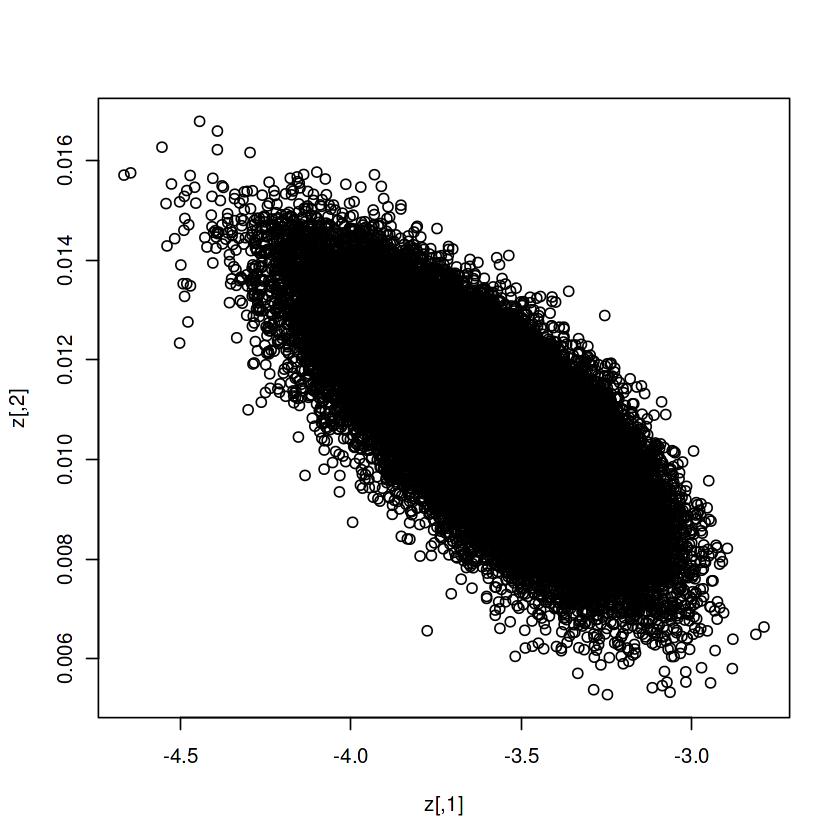

                mean          sd         2.5%          25%         50%
beta[1]  -3.59008973 0.208503230 -4.019328933 -3.725380163 -3.58316794
beta[2]   0.01080681 0.001320079  0.008196536  0.009924147  0.01082047
deviance 24.55763015 2.009620825 22.610109619 23.130784579 23.94159497
p[1]      0.02778340 0.005648497  0.017804608  0.023815755  0.02740501
p[2]      0.02927571 0.005813099  0.018969376  0.025204325  0.02890180
p[3]      0.03802774 0.006720720  0.025865213  0.033334096  0.03767653
p[4]      0.06082356 0.008993883  0.044327621  0.054575110  0.06046949
p[5]      0.13150667 0.018632194  0.096909811  0.118506624  0.13089060
p[6]      0.34146313 0.062536798  0.225417293  0.297893015  0.33943151
yf1[1]   10.87243333 3.930001204  4.000000000  8.000000000 11.00000000
yf1[2]    6.00096667 2.684527938  1.000000000  4.000000000  6.00000000
yf1[3]    5.93687778 2.613238161  1.000000000  4.000000000  6.00000000
yf1[4]    3.04754444 1.745364030  0.000000000  2.000000000  3.00000000
yf1[5]

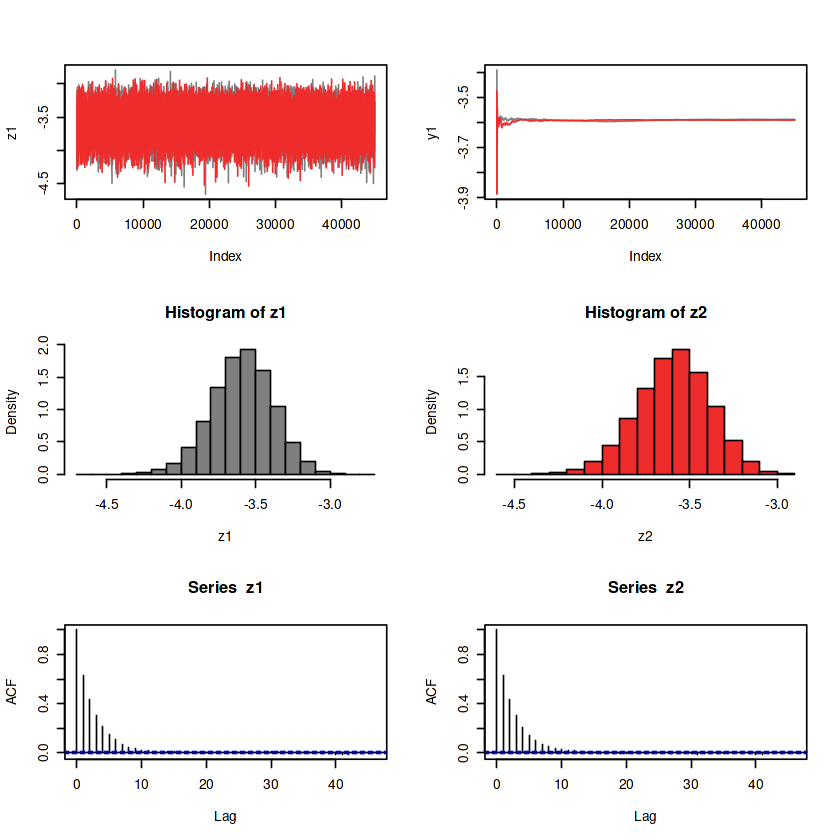

In [ ]:
ej5b.sim4$viewSpace()

ej5b.sim4$graphConvergence()

ej5b.sim4$summaryModel()

ej5b.sim4$dicModelfunc()

## Checamos intervalos de predicción

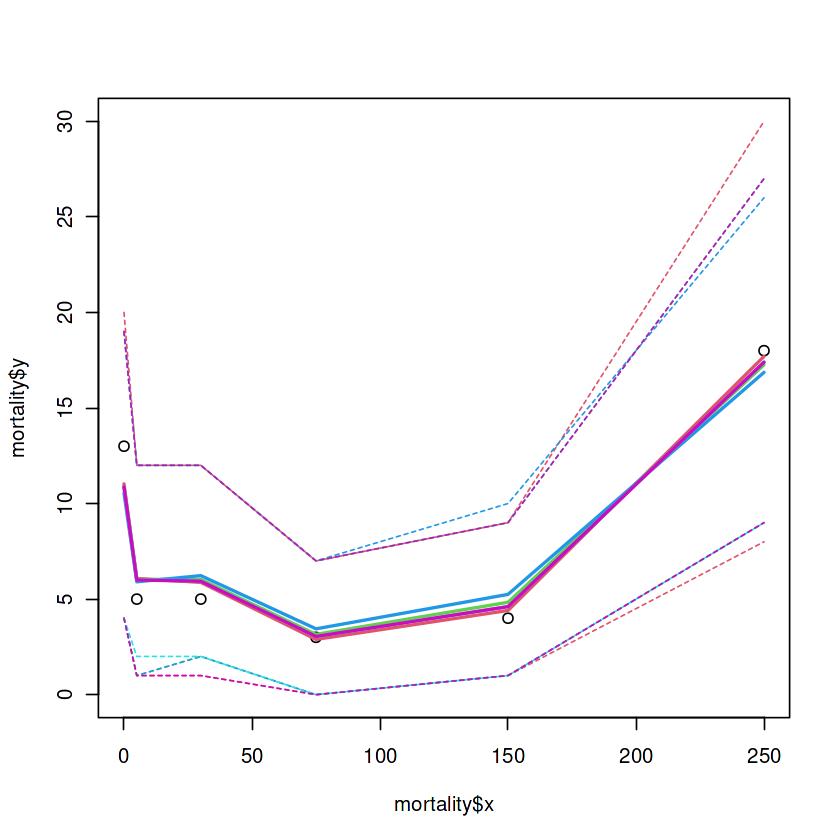

In [ ]:
canvaMortalidad()

mortalidadGraf(ej5a.sim,col=2)

mortalidadGraf(ej5b.sim,col=3)

mortalidadGraf(ej5b.sim2,col=4)

mortalidadGraf(ej5b.sim3,col=5)

mortalidadGraf(ej5b.sim4,col=6)

## Sexto modelo

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode6 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dnegbin(p[i],ne[i])
	mu[i]<-ne[i]*lambda[i]
	lambda[i]<-(1-p[i])/p[i]
	eta[i]<-beta[1]+beta[2]*x[i]
#	logit(1-p[i])<-eta[i]
	p[i]<-1/(1+exp(eta[i]))
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dnegbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dnegbin(pf[i],nef[i]) 
#	etaf[i]<-beta[1]+beta[2]*xf[i]
#	pf[i]<-1/(1+exp(etaf[i])
#}
	yf2 ~ dnegbin(pf,nef) 
	etaf<-beta[1]+beta[2]*xf
	pf<-1/(1+exp(etaf))
}'

ej5c.sim <- jagsModel$new(data, inits, parsbc, modelCode6, n.thin=1, n.iter=50000, n.burnin=5000)

ej5c.sim$runJagsModel()


Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 86

Initializing model



## Checamos convergencia

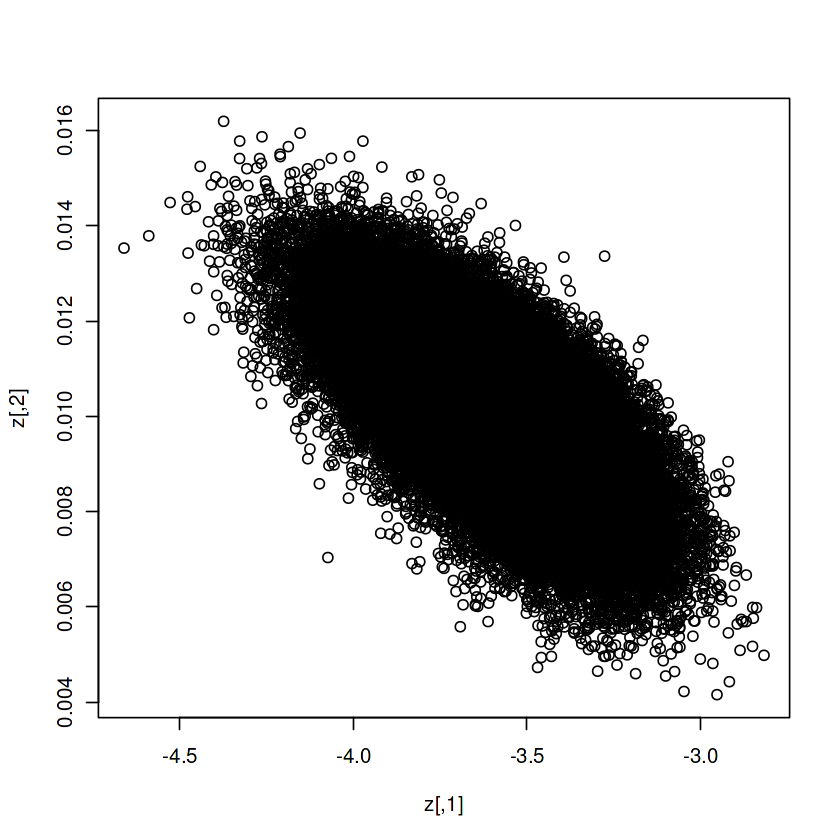

                mean          sd         2.5%          25%         50%
beta[1]  -3.58997071 0.212794200 -4.025072944 -3.731059204 -3.58314855
beta[2]   0.01003155 0.001430602  0.007207287  0.009066232  0.01003187
deviance 25.66462845 2.003138505 23.702871022 24.237897869 25.05119698
p[1]      0.97258406 0.005622612  0.960544699  0.969002340  0.97296323
p[2]      0.97124229 0.005755969  0.958963440  0.967565416  0.97161590
p[3]      0.96349494 0.006490689  0.949814232  0.959324096  0.96385471
p[4]      0.94407952 0.008403612  0.926601895  0.938665583  0.94446219
p[5]      0.88835017 0.016822086  0.853215066  0.877453312  0.88909453
p[6]      0.74370402 0.049421905  0.640954902  0.711251253  0.74600727
yf1[1]   11.03091111 4.100711078  4.000000000  8.000000000 11.00000000
yf1[2]    6.08495556 2.799738615  1.000000000  4.000000000  6.00000000
yf1[3]    5.92554444 2.715391207  1.000000000  4.000000000  6.00000000
yf1[4]    2.95978889 1.837766922  0.000000000  2.000000000  3.00000000
yf1[5]

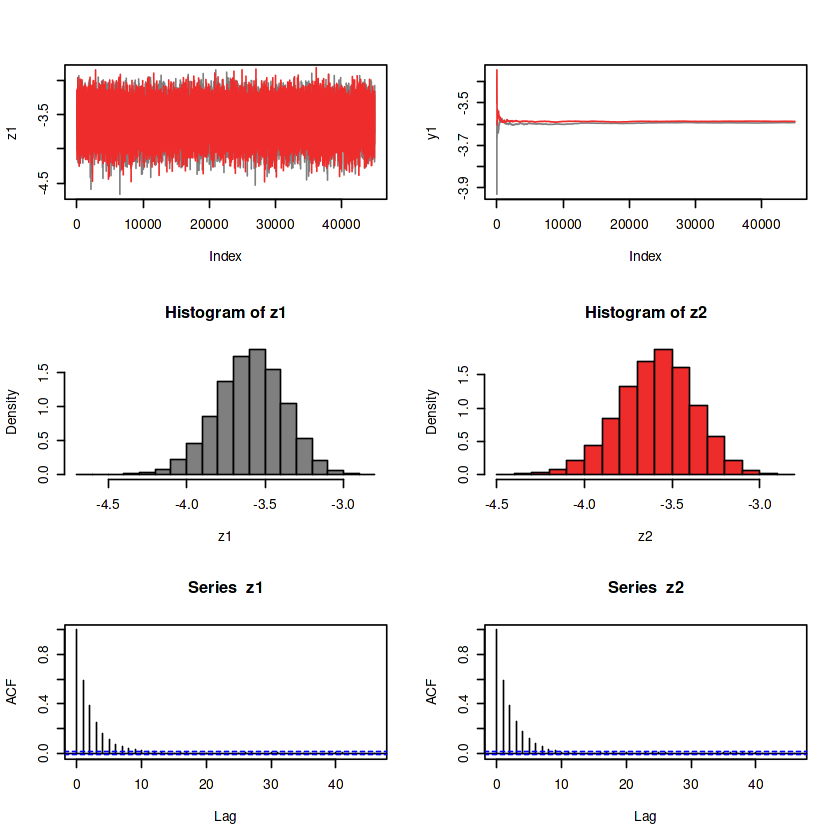

In [ ]:
ej5c.sim$viewSpace()

ej5c.sim$graphConvergence()

ej5c.sim$summaryModel()

ej5c.sim$dicModelfunc()

## Checamos intervalos de predicción

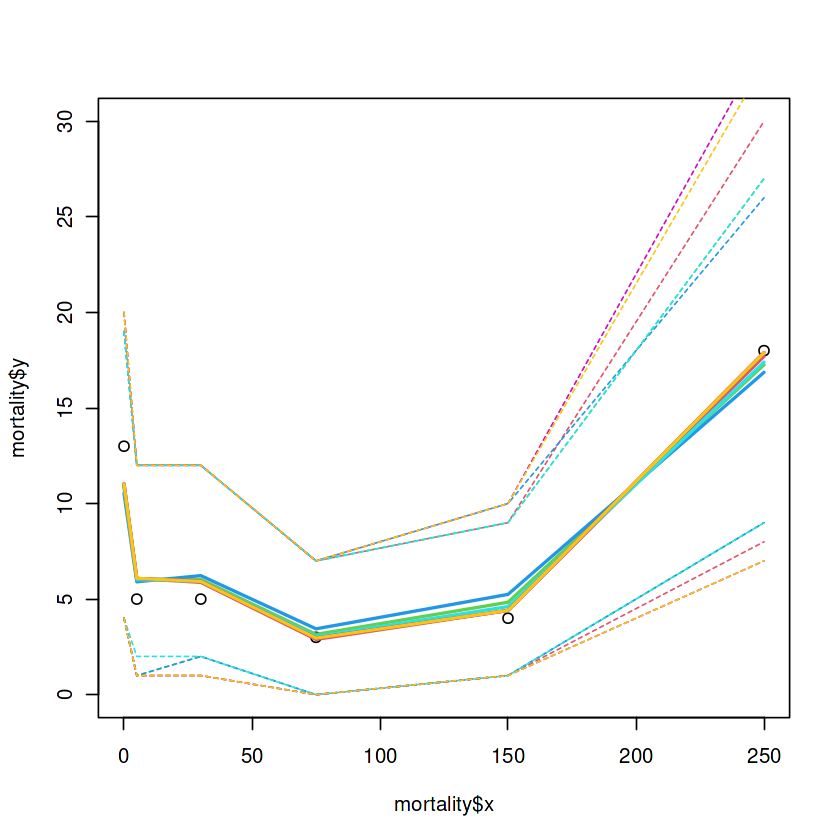

In [ ]:
canvaMortalidad()

mortalidadGraf(ej5a.sim,col=2)

mortalidadGraf(ej5b.sim,col=3)

mortalidadGraf(ej5b.sim2,col=4)

mortalidadGraf(ej5b.sim3,col=5)

mortalidadGraf(ej5b.sim4,col=6)

mortalidadGraf(ej5c.sim,col=7)

## Séptimo modelo

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode7 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbeta(a[i],b[i])
	a[i]<-phy*mu[i]
	b[i]<-phy*(1-mu[i])
#	logit(mu[i])<-beta[1]+beta[2]*x[i]
	eta[i]<-beta[1]+beta[2]*x[i]
	mu[i]<-exp(eta[i])/(1+exp(eta[i]))
	}
#Priors 
phy ~ dgamma(0.01,0.01)
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbeta(a[i],b[i]) }
#Prediction 2
	yf2 ~ dbeta(af,bf) 
	af<-phy*muf
	bf<-phy*(1-muf)
	logit(muf)<-beta[1]+beta[2]*xf
}'

ej5d.sim <- jagsModel$new(data2, inits2, parsd, modelCode7, n.thin=5, n.iter=10000, n.burnin=1000)

ej5d.sim$runJagsModel()

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 10
   Total graph size: 82

Initializing model



## Checamos convergencia

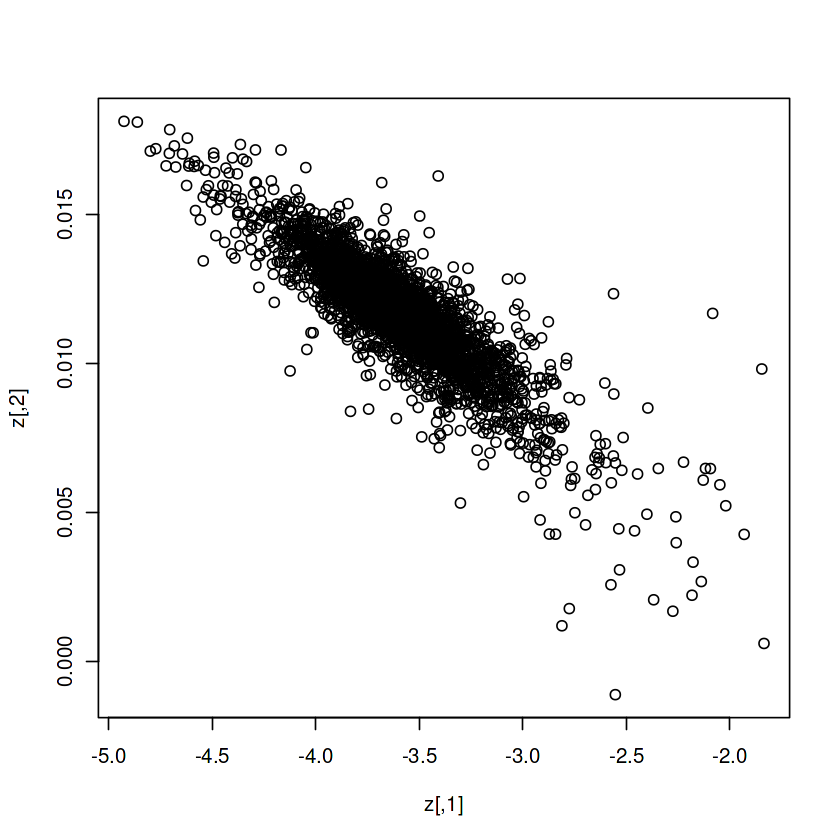

                 mean           sd          2.5%          25%          50%
beta[1]   -3.60321016 3.248937e-01  -4.215740557  -3.79272211  -3.61808763
beta[2]    0.01170975 1.806399e-03   0.007677237   0.01081464   0.01182888
deviance -31.48147418 4.551125e+00 -38.222550701 -34.78442486 -32.28145949
phy      150.92720646 1.042810e+02  20.105003531  73.23127240 128.40339125
yf1[1]     0.02840208 2.337294e-02   0.003035130   0.01481418   0.02368261
yf1[2]     0.02972180 2.333495e-02   0.002967160   0.01610098   0.02489072
yf1[3]     0.03916262 2.747510e-02   0.006479775   0.02370673   0.03453063
yf1[4]     0.06237028 3.001144e-02   0.018425291   0.04374974   0.05851285
yf1[5]     0.13902288 4.484403e-02   0.066041537   0.11280135   0.13444448
yf1[6]     0.33852148 7.278369e-02   0.192013286   0.29823517   0.33851073
yf2        0.22287155 5.514658e-02   0.121325022   0.19116784   0.22093445
                  75%        97.5%     Rhat n.eff
beta[1]   -3.43483836  -2.89776831 1.006588   300


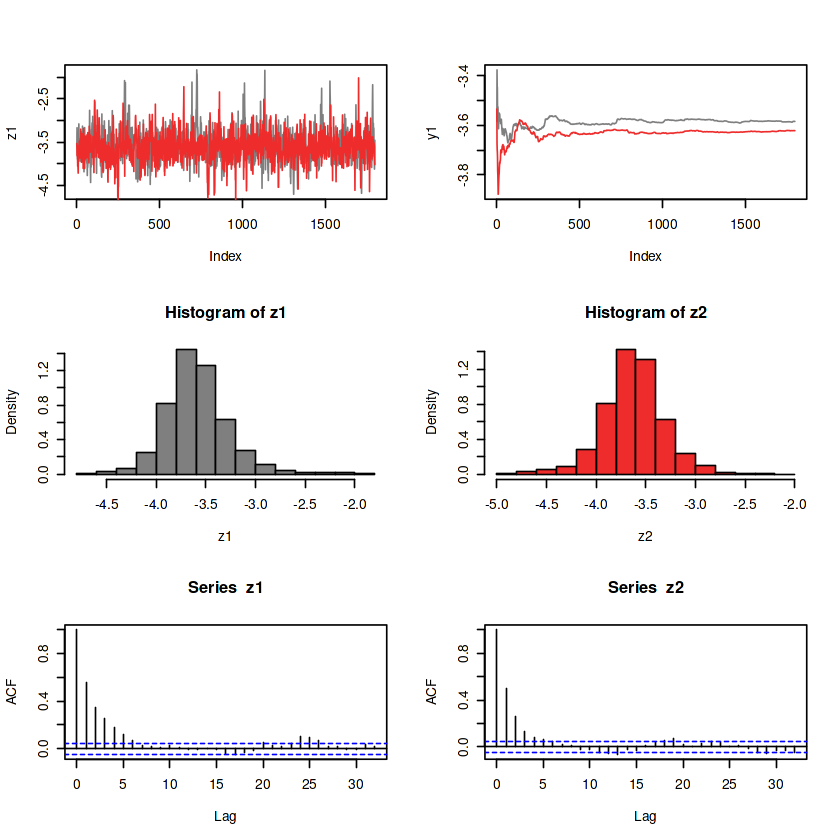

In [ ]:
ej5d.sim$viewSpace()

ej5d.sim$graphConvergence()

ej5d.sim$summaryModel()

ej5d.sim$dicModelfunc()

## Checamos intervalos de predicción

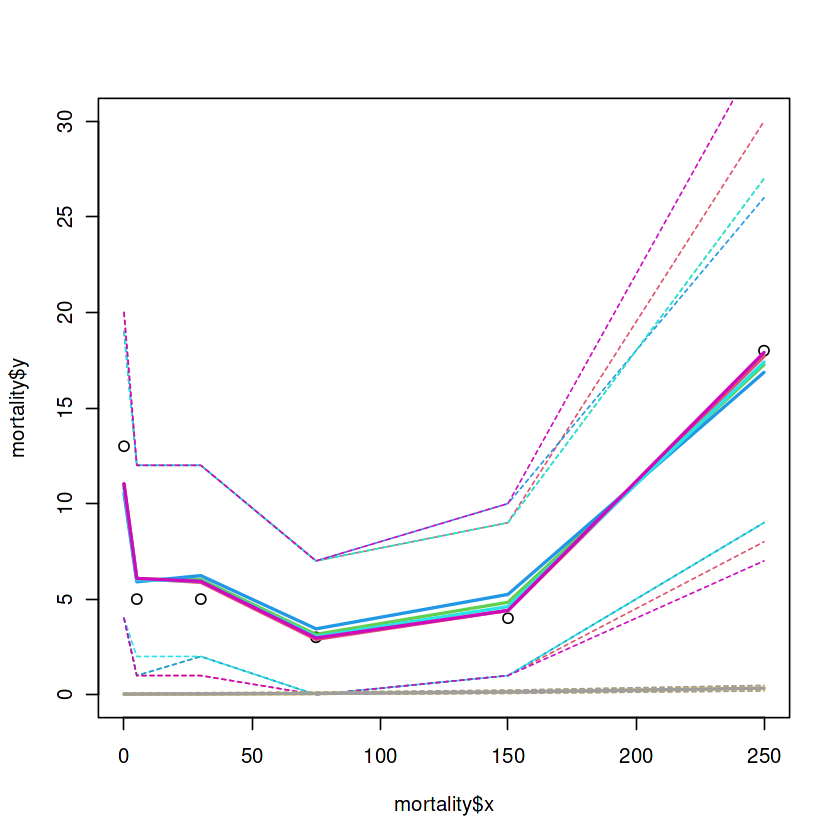

In [ ]:
canvaMortalidad()

mortalidadGraf(ej5a.sim,col=2)

mortalidadGraf(ej5b.sim,col=3)

mortalidadGraf(ej5b.sim2,col=4)

mortalidadGraf(ej5b.sim3,col=5)

mortalidadGraf(ej5b.sim4,col=6)

mortalidadGraf(ej5c.sim,col=7)

mortalidadGraf(ej5d.sim,col=8)